In [1]:
import numpy as np
import utils

# Neuron from scratch

Welcome to the second part of this day. Now that you have learned how to use the gradient descent agorithm, you will use it in a concrete case and develop your first intelligent neuron.

Below, you can select the difficulty of the dataset that will be generated so you can test your neuron in several conditions. I advise you to start with a low or normal difficulty.

In [4]:
NOISE = {'low': 0, 'normal': 2, 'hard': 8, 'extreme': 15}
DIFFICULTY = 'hard'

assert DIFFICULTY == 'low' or DIFFICULTY == 'normal' or DIFFICULTY == 'hard' or DIFFICULTY == 'extreme'

---

# PROJECT XFV-18

In order to improve the safety of the next space missions of the XFV-18 launcher, you have been asked to create an AI capable of controlling a rocket and managing emergency situations.  

Your first mission will be to predict the apogee of your orbit according to the power of the engines.

Researchers have now managed to collect enough data to allow you to train your AI. So you can get to work!

It is now to recover the dataset which is cut in two parts:
 * $ x $ = the power of the rocket engines
 * $ y $ = the maximum altitude of the rocket

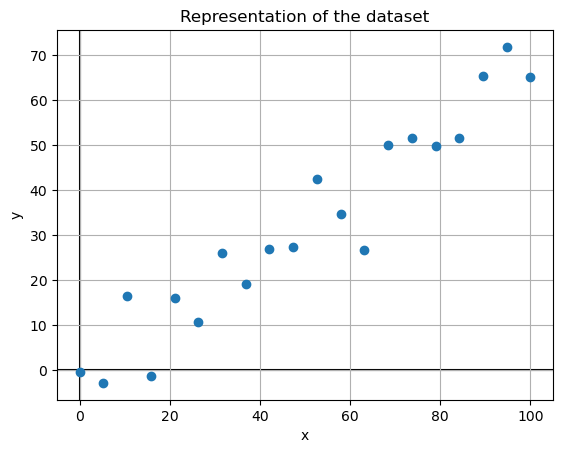

In [5]:
x, y = utils.get_dataset(20, NOISE[DIFFICULTY])
utils.display_dataset(x, y)

> As you can see, the model seems to follow a linear function. A single neuron will be sufficient to correctly predict the maximum altitude of the rocket.

In order to measure the performance of our network, we will have to use a cost function.  
We will use the Mean Squared Error function whose formula is as follows:

$$ MSE(\hat{y}, y) = \frac{1}{n} \sum_{i=0}^{n} (y^{i} - \hat{y}^{i})^2 $$

In [6]:
def mean_squared_error(predict, target):
    if type(predict) == np.ndarray and type(target) == np.ndarray:
        assert len(predict) == len(target)
        return (1 / len(predict)) * np.sum( a = np.square(predict - target))
    else:
        return np.square(np.fabs(predict - target))

In [7]:
class Neuron:
    def __init__(self, x, lr = 0.00001):
        self.lr = lr
        self.w = np.random.rand(1)
        self.b = np.random.rand(1)
        self.grad_w = np.zeros(x.shape)
        self.grad_b = np.zeros(1)

    def forward(self, input):
        return np.dot(input, self.w) + self.b

    def backward(self, x, y, target):
        self.grad_w = ((target - y) * mean_squared_error(y, target) - self.b) * self.lr
        self.grad_b = (target - y) * self.lr
        
    def apply_gradients(self):
        # TODO: Apply computed gradients
        self.w -= self.grad_w
        self.b -= self.grad_b
        self.reset_gradients()

    def reset_gradients(self):
        self.grad_w = np.zeros(1)
        self.grad_b = np.zeros(1)

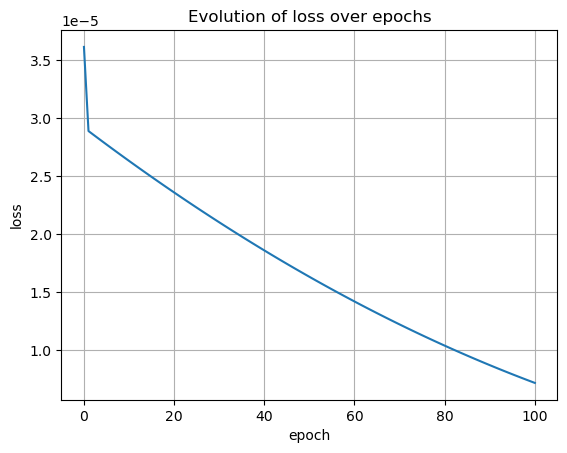

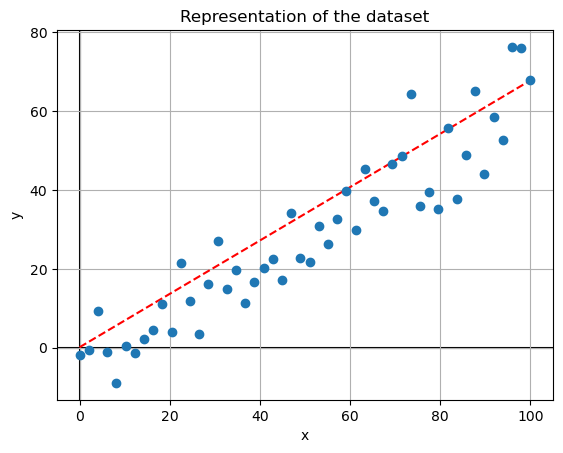

Lowest loss value achieved: 0.000007
Final neuron: 0.68 x + 0.11


In [10]:
x, y = utils.get_dataset(50, NOISE[DIFFICULTY])
x = np.expand_dims(x, 1)

neuron : Neuron = Neuron(x)
epochs = 100

loss = 0
loss_history = np.ones(epochs)

for epoch in range(epochs):
    for i in range(np.shape(x)[0]):
        # TODO: make a prediction with actual model
        prediction = neuron.forward(x[i])

        # TODO: compute loss with expected value
        loss = mean_squared_error(prediction, y[i])

        # TODO: train model
        neuron.backward(x[i], y[i], prediction)
        neuron.apply_gradients()

    loss_history[epoch] = loss

utils.display_loss_history(loss_history, epochs)
utils.display_dataset(x, y, neuron)
print('Lowest loss value achieved: %f' % np.min(loss_history))
print('Final neuron: %.2f x + %.2f' % (neuron.w, neuron.b))

In [11]:
utils.start_board_computer(neuron)

--- BOARD COMPUTER ---
Initial engine power: 100%
Maximum planned altitude: 67km
